In [5]:
%pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 KB 13.4 MB/s eta 0:00:00m eta 0:00:010:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch import arch_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Baixar os dados das ações da Apple
dogecoin = yf.download('DOGE-USD', period='1y')

# Criar uma coluna de retorno diário
dogecoin['Return'] = dogecoin['Close'].pct_change()

# Criar a variável target: 1 para subida e 0 para descida
dogecoin['Target'] = (dogecoin['Return'].shift(-1) > 0).astype(int)

# Remover valores nulos
dogecoin.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Selecionar as features e o target
X = dogecoin[['Close', 'Volume', 'Return']].values
y = dogecoin['Target'].values

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Regressão Logistica

In [4]:
# Treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.58      0.57      0.57        58
           1       0.53      0.54      0.53        52

    accuracy                           0.55       110
   macro avg       0.55      0.55      0.55       110
weighted avg       0.56      0.55      0.55       110



# GARCH 

In [8]:
# Supondo que df seja o seu DataFrame
dogecoin['log_return'] = np.log(dogecoin['Close'] / dogecoin['Close'].shift(1))
dogecoin.dropna(inplace=True)  # Remover valores nulos

In [9]:
from arch import arch_model

# Ajustar o modelo GARCH(1,1)
returns = dogecoin['log_return']
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Exibir o resumo do modelo
print(garch_fit.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                648.625
Distribution:                  Normal   AIC:                          -1289.25
Method:            Maximum Likelihood   BIC:                          -1273.65
                                        No. Observations:                  365
Date:                Wed, Sep 18 2024   Df Residuals:                      364
Time:                        15:09:50   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.4812e-04  1.766e-03      0.197      0.844 

/home/linguica/.env/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002082. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [10]:
from arch import arch_model

# Ajustar o modelo GARCH(1,1)
returns = dogecoin['log_return']
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Exibir o resumo do modelo
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                648.625
Distribution:                  Normal   AIC:                          -1289.25
Method:            Maximum Likelihood   BIC:                          -1273.65
                                        No. Observations:                  365
Date:                Wed, Sep 18 2024   Df Residuals:                      364
Time:                        15:10:27   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.4812e-04  1.766e-03      0.197      0.844 

/home/linguica/.env/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002082. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [11]:
# Prever a volatilidade para os próximos 10 dias
forecast = garch_fit.forecast(horizon=10)
predicted_volatility = np.sqrt(forecast.variance.iloc[-1])
print(predicted_volatility)

h.01    0.033898
h.02    0.034373
h.03    0.034826
h.04    0.035261
h.05    0.035677
h.06    0.036075
h.07    0.036458
h.08    0.036825
h.09    0.037177
h.10    0.037516
Name: 2024-09-18 00:00:00, dtype: float64


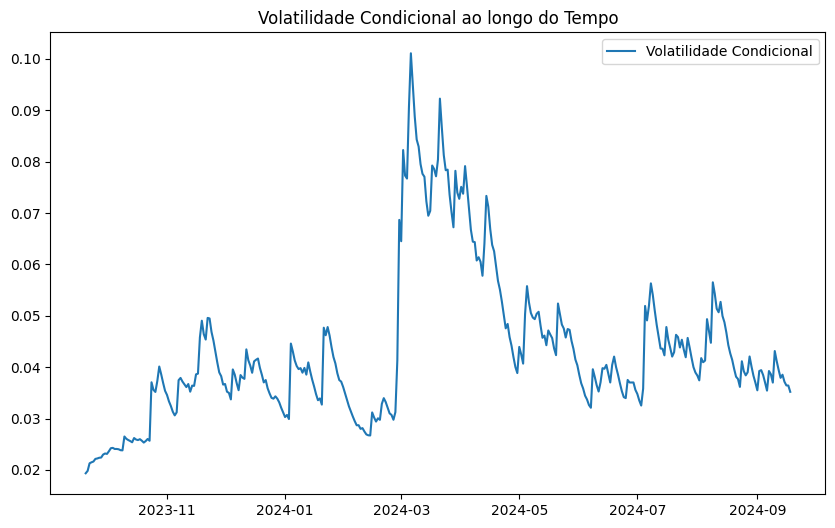

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(garch_fit.conditional_volatility, label='Volatilidade Condicional')
plt.title('Volatilidade Condicional ao longo do Tempo')
plt.legend()
plt.show()